In [5]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image
import cv2
import pytesseract as pyt

In [6]:
sample_folder= 'c:/Users/ADMIN/Desktop/Muzammil/Coding/06-Projects/Hand-Writing-Recognition/data/processed/train_v2/sample/'
preprocessed_sample_folder = 'c:/Users/ADMIN/Desktop/Muzammil/Coding/06-Projects/Hand-Writing-Recognition/data/processed/preprocessed_images/sample'

In [ ]:
def select_random_images(folder, num_samples= 5):
    '''Function to work with only specific random images'''
    # Fetching All Files
    total_files= [file for file in os.listdir(folder) if file.endswith('jpg') or file.endswith('png')]
    
    if len(total_files) < num_samples:
        print('Sample demanded is greater than Population!')
        num_samples= total_files
    
    random_files= random.sample(total_files, num_samples)
    return random_files
def display_images(folder, image_files):
    '''Function to display images'''
    
    plt.figure(figsize=(10, 10))
    for img_file in image_files:
        file= os.path.join(folder, img_file)
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        
        plt.imshow(image, cmap='gray')
        plt.title(img_file)
        plt.axis('off')  # Hide axes
        plt.show()
def preprocess_images(input_folder, output_folder, target_size=(64, 64)):
    os.makedirs(output_folder, exist_ok=True)
    
    for img_file in os.listdir(input_folder):
        if img_file.endswith('.jpg') or img_file.endswith('.png'):
            img_path = os.path.join(input_folder, img_file)
            # Read image
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            # Resize image
            image_resized = cv2.resize(image, target_size)
            # Normalize image
            image_normalized = image_resized / 255.0  # Scale to [0, 1]
            # Save preprocessed image
            cv2.imwrite(os.path.join(output_folder, img_file), image_normalized * 255)  # Save as 8-bit image

def myconfig(psm= 6, oem= 3):
    '''Function to set custom configurations for pytesseract'''
    custom_config= r'--oem {} --psm {}'.format(oem, psm)
    return custom_config

In [29]:
def ocr_images(folder, image_files):
    '''Function to analyze preprocessed images'''

    for image_file in image_files:
        plt.figure(figsize=(3, 3))
        file_path = os.path.join(folder, image_file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        text= pyt.image_to_string(image, config= myconfig())

        plt.imshow(image, cmap='gray')
        plt.title(f'{image_file}')
        plt.axis('off')
        plt.show()
        print(f'Text: {text}\n')

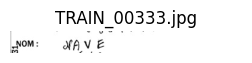

Text: HOM: AVE.




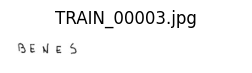

Text: BENES




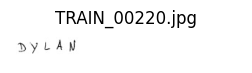

Text: DyLAN




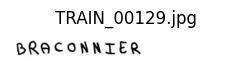

Text: BRACONNTER




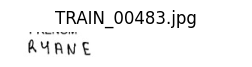

Text: AUANE




In [30]:
selected_images= select_random_images(sample_folder)
# display_images(sample_folder, selected_images)
ocr_images(sample_folder, selected_images)